# Preparación del dataset

El dataset CIFAR10 es un dataset para experimentar con reconocimiento de imágenes. Consiste en un dataset de 60.000 imágenes pequeñas (32 x 32 pixeles) con 10 clases de objetos (6000 por clase), es decir, cada clase tiene la misma probabilidad.

El dataset contiene 50000 ejemplos de entrenamiento y 10000 de prueba. Del conjunto de entrenamiento, se han extraído al azar 10000 ejemplos desde el conjunto de entrenamiento para el conjunto de validación. Por lo que al final se cuenta con 40000 ejemplos de entrenamiento, 10000 de validación y 10000 de prueba.

In [1]:
from scipy.misc import imread
import cPickle as pickle
import numpy as np
import os
 
def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
    return X, np.array(Y)
 
def load_CIFAR10(PATH):
    xs, ys = [], []
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % b)
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
 
    numero_imagenes = 10000
    np.random.seed(2)
    seleccion = np.random.choice(50000, numero_imagenes, replace = False)
 
    Xva = np.array(list(Xtr[i] for i in seleccion))
    Yva = np.array(list(Ytr[i] for i in seleccion))
 
    Xtr = np.delete(Xtr, seleccion, 0)
    Ytr = np.delete(Ytr, seleccion)
   
    return Xtr, Ytr, Xte, Yte, Xva, Yva
 
#you need to add Xval
Xtr, Ytr, Xte, Yte, Xva, Yva = load_CIFAR10('./dataset')

print Xtr.shape
print Ytr.shape
print Xva.shape
print Yva.shape
print Xte.shape
print Yte.shape

(40000, 3072)
(40000,)
(10000, 3072)
(10000,)
(10000, 3072)
(10000,)


b) Construya una función que escale apropiadamente las imágenes antes de trabajar. Experimente sólo escalando los datos de acuerdo a la intensidad máxima de pixel *(i.e., dividiendo por 255)* y luego centrando y escalándolos como en actividades anteriores.

In [23]:
def escalar(data, completo = True):
    filas, columnas = data.shape
    data = data.astype(np.float64)
    if completo:
        for i in range(columnas):
            data[:filas, i] = (data[:filas, i]- np.mean(data[:filas, i]))/np.std(data[:filas, i])
        return data
    return data/255.0

In [24]:
print "El conjunto de training original\n"
print Xtr
print"\n"
print"El conjunto de training escalando de acuerdo a la intesidad maxima\n"
print escalar(Xtr, False)
print"\n"
print"El conjunto de training escalando de forma normal\n"
print escalar(Xtr)

El conjunto de training original

[[154 126 105 ..., 139 142 144]
 [255 253 253 ...,  83  83  84]
 [ 28  37  38 ...,  28  37  46]
 ..., 
 [145 151 156 ...,  56  53  54]
 [189 186 185 ..., 169 171 171]
 [229 236 234 ..., 173 162 161]]


El conjunto de training escalando de acuerdo a la intesidad maxima

[[ 0.60392157  0.49411765  0.41176471 ...,  0.54509804  0.55686275
   0.56470588]
 [ 1.          0.99215686  0.99215686 ...,  0.3254902   0.3254902
   0.32941176]
 [ 0.10980392  0.14509804  0.14901961 ...,  0.10980392  0.14509804
   0.18039216]
 ..., 
 [ 0.56862745  0.59215686  0.61176471 ...,  0.21960784  0.20784314
   0.21176471]
 [ 0.74117647  0.72941176  0.7254902  ...,  0.6627451   0.67058824
   0.67058824]
 [ 0.89803922  0.9254902   0.91764706 ...,  0.67843137  0.63529412
   0.63137255]]


El conjunto de training escalando de forma normal

[[ 0.31999272 -0.05418421 -0.35724693 ...,  0.38885303  0.43148518
   0.44895838]
 [ 1.69385262  1.69638376  1.68843315 ..., -0.47413728 -0.4732

# Redes neuronales artificiales

>c) Diseñe, entrene y evalúe una red neuronal para el problema CIFAR a partir de la representación original
de las imágenes (píxeles RGB). Experimente con distintas arquitecturas y métodos de entrenamiento, midiendo el error de clasificación sobre el conjunto de validación. En base a esta última medida de desempeñoo, decida qué modelo, de entre todos los evaluados, evaluará finalmente en el conjunto de test.
Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o igual a $0.5$.

Se entrenó una red neuronal con tres parámetros distintos de *epoch* con $e = \{ 2, 4, 8 \}$. Se vió que para el valor $e = 8$ fue el mejor valor, mejorando a medida que se aumenta el valor de *epoch*.

In [6]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler

def scaler_function(Xtr, Xt, Xva, scale = True):
    Xtr, Xt, Xva = Xtr.astype(np.float64), Xt.astype(np.float64), Xva.astype(np.float64)
    scaler = StandardScaler(with_std = scale).fit(Xtr)
    Xtr_scaled = scaler.transform(Xtr)
    Xt_scaled = scaler.transform(Xt)
    Xva_scaled = scaler.transform(Xva)
    return Xtr_scaled, Xt_scaled, Xva_scaled

Xtr_scaled, Xte_scaled, Xva_scaled = scaler_function(Xtr, Xte, Xva)
Ytr_categorical = to_categorical(Ytr)
Yte_categorical = to_categorical(Yte)
Yva_categorical = to_categorical(Yva)

Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

In [33]:
error_validate_epoch = []
error_train_epoch = []

for k in range(1,4):
    
    model = Sequential()
    model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, init='uniform', activation='softmax'))
    model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(Xtr_scaled, Ytr_categorical, nb_epoch=2**k, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

    scores = model.evaluate(Xtr_scaled, Ytr_categorical)
    tr_acc = scores[1]
    
    scores = model.evaluate(Xva_scaled, Yva_categorical)
    va_acc = scores[1]
    
    print "\nEpoch %d ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(2**k, va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
    print"-----------------------------------------------------------------------------------------\n"
    error_validate_epoch.append(1 - va_acc)
    error_train_epoch.append(1 - tr_acc)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 529s - loss: 0.2919 - acc: 0.9008 - val_loss: 0.2727 - val_acc: 0.9022
Epoch 2/2
10000/10000 [==============================] - 61s    

Epoch 2 ---> Va. Acc 0.904100   Va. Error 0.095900 | Tr. Acc 0.904265   Tr. Error 0.095735
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/4
40000/40000 [==============================] - 528s - loss: 0.2918 - acc: 0.9008 - val_loss: 0.2738 - val_acc: 0.9021
Epoch 2/4
40000/40000 [==============================] - 534s - loss: 0.2678 - acc: 0.9031 - val_loss: 0.2609 - val_acc: 0.9044
Epoch 3/4
40000/40000 [==============================] - 544s - loss: 0.2576 - acc: 0.9052 - val_loss: 0.2529 - val_acc: 0.9061
Epoch 4/4
10000/10000 [==============================] - 61s    

Epoch 4 ---> Va. Acc 0.907300   Va. Error 0.092700 | Tr. Acc 0.908320   Tr

Al observar el gráfico se puede ver que el error pareciera disminuir linealmente. Se deberían hacer más pruebas con más posibles valores para el parámetro para verificar esta afirmación pues los errores no varían tanto.

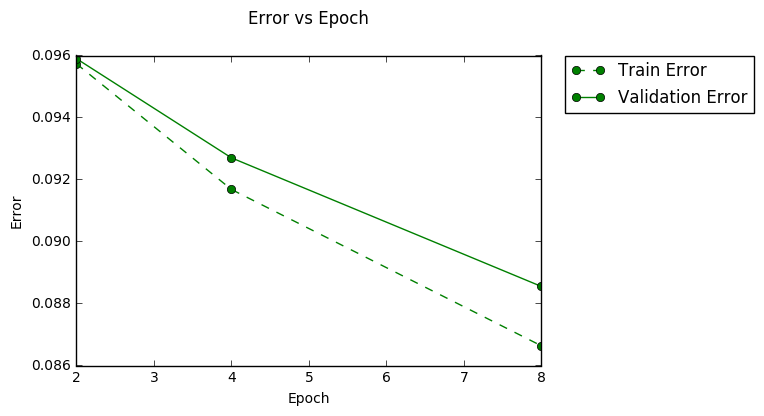

In [34]:
potencias = [2**x for x in range(1, 4)]

plt.plot(potencias, error_train_epoch, 'go--', label='Train Error')
plt.plot(potencias, error_validate_epoch, 'go-', label= 'Validation Error')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Error vs Epoch', y=1.08)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

Luego, se probó variando el número $n$ de neuronas con $n = \{ 100, 150, 200\}$. Nuevamente los errores no varían tanto, pero el que dió mejor fue usando 200 neuronas lo cual es esperable puesto que con más neuronas el modelo puede aprender más de los datos. Sin embargo, la mejora no es muy significativa

In [ ]:
error_validate_epoch = []
error_train_epoch = []

for k in [100, 150, 200]:
    
    model = Sequential()
    model.add(Dense(k, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, init='uniform', activation='softmax'))
    model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(Xtr_scaled, Ytr_categorical, nb_epoch=2, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

    scores = model.evaluate(Xtr_scaled, Ytr_categorical)
    tr_acc = scores[1]
    
    scores = model.evaluate(Xva_scaled, Yva_categorical)
    va_acc = scores[1]
    
    print "\nNeuronas %d ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(k, va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
    print"-----------------------------------------------------------------------------------------\n"
    
    error_validate_epoch.append(1 - va_acc)
    error_train_epoch.append(1 - tr_acc)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 537s - loss: 0.2914 - acc: 0.9008 - val_loss: 0.2731 - val_acc: 0.9022
Epoch 2/2
40000/40000 [==============================] - 878s - loss: 0.2873 - acc: 0.9011 - val_loss: 0.2692 - val_acc: 0.9031
Epoch 2/2
10000/10000 [==============================] - 95s    

Neuronas 150 ---> Va. Acc 0.905220   Va. Error 0.094780 | Tr. Acc 0.905755   Tr. Error 0.094245
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 1055s - loss: 0.2852 - acc: 0.9013 - val_loss: 0.2670 - val_acc: 0.9029
Epoch 2/2
10000/10000 [==============================] - 125s   

Neuronas 200 ---> Va. Acc 0.906060   Va. Error 0.093940 | Tr. Acc 0.906520   Tr. Error 0.093480
-----------------------------------------------------------------------------------------



In [ ]:
plt.plot([5, 10, 15], error_train_epoch, 'go--', label='Train Error')
plt.plot([5, 10, 15], error_validate_epoch, 'go-', label= 'Validation Error')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Error vs Epoch', y=1.08)
plt.xlabel('Neuronas Ocultas')
plt.ylabel('Error')
plt.show()

Finalmente, se probó cambiando la función de activación probando con *softmax*, *sigmoid* y *relu*. El mejor fue *softmax*, seguido de cerca por *sigmoid* ambos con un *accuracy* cercano a 0.90 en el conjunto de validación. La función de activación *relu*, sin embargo, tuvo un desempeño más decadente logrando solamente un *accuracy* de 0.81.

In [11]:
model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr_scaled, Ytr_categorical, nb_epoch= 2, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

scores = model.evaluate(Xtr_scaled, Ytr_categorical)
tr_acc = scores[1]

scores = model.evaluate(Xva_scaled, Yva_categorical)
va_acc = scores[1]


softmax = (va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print "\nSoftmax ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print"-----------------------------------------------------------------------------------------\n"


model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr_scaled, Ytr_categorical, nb_epoch= 2, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

scores = model.evaluate(Xtr_scaled, Ytr_categorical)
tr_acc = scores[1]

scores = model.evaluate(Xva_scaled, Yva_categorical)
va_acc = scores[1]

sigmoid = (va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print "\nSigmoid ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print"-----------------------------------------------------------------------------------------\n"


model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='relu'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr_scaled, Ytr_categorical, nb_epoch= 2, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

scores = model.evaluate(Xtr_scaled, Ytr_categorical)
tr_acc = scores[1]

scores = model.evaluate(Xva_scaled, Yva_categorical)
va_acc = scores[1]

relu = (va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print "\nRelu ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print"-----------------------------------------------------------------------------------------\n"

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 520s - loss: 0.2922 - acc: 0.9006 - val_loss: 0.2734 - val_acc: 0.9021
Epoch 2/2
10000/10000 [==============================] - 60s    

Softmax ---> Va. Acc 0.904560   Va. Error 0.095440 | Tr. Acc 0.904722   Tr. Error 0.095278
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 523s - loss: 0.3180 - acc: 0.8962 - val_loss: 0.2863 - val_acc: 0.9021
Epoch 2/2
10000/10000 [==============================] - 61s    

Sigmoid ---> Va. Acc 0.903180   Va. Error 0.096820 | Tr. Acc 0.902910   Tr. Error 0.097090
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 559s - loss: 2.7817 - acc: 0.8114 - val_l

# SVM No Lineal

>(e) Entrene una SVM no lineal sobre los pixeles originales y sobre los atributos de alto nivel utilizados para
representar las imágenes en el item anterior. Puede utilizar el conjunto de validación para seleccionar
hiper-parámetros, como el nivel de regularización aplicado y/o la función de kernel a utilizar.

Para el entrenamiento de la SVM no lineal se consideraron los pixeles originales de las imágenes junto a las características de alto nivel (histogramas de tono y descriptores HOG) con escalamiento.

In [2]:
from sklearn.preprocessing import StandardScaler
from top_level_features import hog_features
from top_level_features import color_histogram_hsv
from top_level_features import extract_features
import datetime

Xtr, Ytr, Xte, Yte, Xva, Yva = load_CIFAR10('./dataset')

print datetime.datetime.now().time()
feat = extract_features(Xtr,[hog_features, color_histogram_hsv])
Xtrf = np.concatenate((Xtr,feat),axis=1)
print datetime.datetime.now().time()
feat = extract_features(Xva,[hog_features, color_histogram_hsv])
Xvaf = np.concatenate((Xva,feat),axis=1)
print datetime.datetime.now().time()
feat = extract_features(Xte,[hog_features, color_histogram_hsv])
Xtef = np.concatenate((Xte,feat),axis=1)
print datetime.datetime.now().time()

scaler = StandardScaler().fit(Xtrf)
Xtrs = scaler.transform(Xtrf)
Xvas = scaler.transform(Xvaf)
Xtes = scaler.transform(Xtef)

22:14:21.214893
(40000, 32, 32, 3)
22:15:43.075564
(10000, 32, 32, 3)
22:16:03.425401
(10000, 32, 32, 3)
22:16:24.316927


Se selecciono el kernel a utilizar y el parámetro de regularización C con un método iterativo. Primero, se probó cual de los dos kernels a utilizar con $C=1.0$. Luego de seleccionado el kernel, se probó cual valor para $C$ era mejor con $C \in \{ 0.1, 1, 10 \}$. Cabe notar que por limitaciones de tiempo se limitó la ejecución del solver interno de la SVM a 300 iteraciones.

Se obtuvó así una SVM no lineal haciendo uso de un kernel Gaussiano con un C = 1.0. El *accuracy* en el conjunto de entrenamiento fue de 0.4732, en el conjunto de validación de 0.4261 y en el conjunto de pruebas 0.4253. Este resultado podría mejorarse haciendo uso de más iteraciones en el solver o dejar que la optimización se complete.

In [3]:
from sklearn.svm import SVC
import time
import datetime

def get_best_SVC(Xtr,Ytr,Xva,Yva):
    kernels = ['poly','rbf']
    possible_C = [0.1,10.0] #C=1.0 se prueba cuando se prueban los kernels
    best_score = 0
    best_model = SVC()
    best_kernel = 'rbf'
    best_C = 1.0
    print datetime.datetime.now().time()
    #primero seleccionamos el kernel
    for k in kernels:
        model = SVC(kernel = k, random_state = 0, max_iter = 300)
        model.fit(Xtr, Ytr)
        score = model.score(Xva,Yva)
        if( score >= best_score ):
            best_score = score
            best_model = model
            best_kernel = k
            best_C = 1.0
        print "Kernel=%s, C=%f, score=%f"%(k,1.0,score)
        print datetime.datetime.now().time()
    
    #luego seleccionamos C
    for Ct in possible_C:
        model = SVC(kernel = best_kernel, C=Ct, random_state = 0, max_iter = 300)
        model.fit(Xtr, Ytr)
        score = model.score(Xva,Yva)
        if( score >= best_score ):
            best_score = score
            best_model = model
            best_C = Ct
        print "Kernel=%s, C=%f, score=%f"%(best_kernel,Ct,score)
        print datetime.datetime.now().time()
    return best_model, best_kernel, best_C, best_score
    
start = time.time()
best_SVC, best_kernel, best_C, best_SVC_score = get_best_SVC(Xtrs,Ytr,Xvas,Yva)
end = time.time()
print "%f segundos"%(end-start)
print "Mejor kernel:", best_kernel
print "Mejor C:", best_C
print "Score train:",best_SVC.score(Xtrs, Ytr)
print "Score valid:",best_SVC_score
print "Score test:",best_SVC.score(Xtes, Yte)

22:22:03.658636


/home/worm/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Kernel=poly, C=1.000000, score=0.143400
22:48:32.655011
Kernel=rbf, C=1.000000, score=0.426100
23:18:50.436049
Kernel=rbf, C=0.100000, score=0.328100
23:47:43.741294
Kernel=rbf, C=10.000000, score=0.398400
00:18:50.089056
7006.668371 segundos
Mejor kernel: rbf
Mejor C: 1.0
Score train: 0.4732
Score valid: 0.4261
Score test: 0.4253


Al entrenar la SVM completa con los parámetros obtenidos previamente se puede mejorar bastante el resultado. El *accuracy* obtenido fue de 0.7961 para el conjunto de entrenamiento, 0.6237 para el conjunto de validación y de 0.618 para el conjunto de pruebas.

In [5]:
from sklearn.svm import SVC
import time
import datetime
   
print datetime.datetime.now().time()
start = time.time()
model_SVC = SVC(kernel = best_kernel, C=best_C, random_state = 0)
model_SVC.fit(Xtrs,Ytr)
end = time.time()
print "%f segundos"%(end-start)
print "Mejor kernel:", best_kernel
print "Mejor C:", best_C
print "Score train:",best_SVC.score(Xtrs, Ytr)
print "Score valid:",best_SVC.score(Xvas, Yva)
print "Score test:",best_SVC.score(Xtes, Yte)
print datetime.datetime.now().time()

01:29:02.806582
10706.278124 segundos
Mejor kernel: rbf
Mejor C: 1.0
Score train: 0.79615
Score valid: 0.6237
Score test: 0.618
06:12:11.883237


# Árbol de Decisión

>(f) Entrene un árbol de clasificación sobre los pixeles originales y sobre los atributos de alto nivel utilizados para representar las imágenes en el item anterior. Puede utilizar el conjunto de validación para seleccionar hiper-parámetros, como la profundidad máxima del árbol.

Para el entrenamiento del árbol se consideraron los pixeles originales de las imágenes junto a las características de alto nivel (histogramas de tono y descriptores HOG) sin escalamiento.

In [2]:
from top_level_features import hog_features
from top_level_features import color_histogram_hsv
from top_level_features import extract_features
import datetime

Xtr, Ytr, Xte, Yte, Xva, Yva = load_CIFAR10('./dataset')

print datetime.datetime.now().time()
feat = extract_features(Xtr,[hog_features, color_histogram_hsv])
Xtrf = np.concatenate((Xtr,feat),axis=1)
print datetime.datetime.now().time()
feat = extract_features(Xva,[hog_features, color_histogram_hsv])
Xvaf = np.concatenate((Xva,feat),axis=1)
print datetime.datetime.now().time()
feat = extract_features(Xte,[hog_features, color_histogram_hsv])
Xtef = np.concatenate((Xte,feat),axis=1)
print datetime.datetime.now().time()

15:49:31.505173
(40000, 32, 32, 3)
15:50:53.801199
(10000, 32, 32, 3)
15:51:14.402433
(10000, 32, 32, 3)
15:51:35.538437


Se limitó la altura del árbol. Previamente se probó con parámetros por defecto y se obtuvó un árbol de 44 niveles de profundidad el cual generaba un serio sobre-ajuste (*accuracy* de 1.0 en el conjunto de entrenamiento y de 0.2 en el conjunto de pruebas).

Para seleccionar una buena profundidad se seleccionó la profundidad máxima $d \in \{2,4,8,16,32\}$ que tuviera mejor *accuracy* sobre el conjunto de validación. 

El mejor árbol encontrado fue con 8 niveles de profundidad. Si la profundidad del árbol hubiese sido más grande no empeoraba considerablemente la *accuracy* sobre el conjunto de validación. Con 16 y 32 niveles la *accuracy* era apenas un 0.1 y 0.2 menor que con 8 niveles, respectivamente.

El árbol de 8 niveles obtenido logró un *accuracy* cercano a 0.3 en todos los conjuntos, con un *accuracy* de 0.3757 en el conjunto de entrenamiento, de 0.3075 en el conjunto de validación y de 0.3177 en el conjunto de pruebas.

In [6]:
from sklearn.tree import DecisionTreeClassifier as CTree
import time
import datetime

def get_best_tree(Xtr,Ytr,Xva,Yva):
    #se probó previamente que la profundidad por defecto quedaba en 44
    #con un serio over-fitting siendo peor su rendimiento que un arbol testeado con profundidad 10
    depths = [2,4,8,16,32]
    best_score = 0
    best_model = CTree()
    best_depth = 0
    print datetime.datetime.now().time()
    for depth in depths:
        model = CTree(max_depth = depth)
        model.fit(Xtr, Ytr)
        score = model.score(Xva,Yva)
        if( score >= best_score ):
            best_score = score
            best_model = model
            best_depth = depth
        print "Depth=%d, score=%f"%(depth,score)
        print datetime.datetime.now().time()
    return best_model, best_depth, best_score

start = time.time()
best_model, best_depth, best_score = get_best_tree(Xtrf,Ytr,Xvaf,Yva)
end = time.time()
print "%f segundos"%(end-start)
print "Mejor profundidad:", best_depth
print "Score train:",best_model.score(Xtrf, Ytr)
print "Score valid:",best_score
print "Score test:",best_model.score(Xtef, Yte)

14:52:48.145623
Depth=2, score=0.190100
14:53:11.751494
Depth=4, score=0.243700
14:53:57.763704
Depth=8, score=0.307500
14:55:36.248859
Depth=16, score=0.292500
14:59:02.498599
Depth=32, score=0.281000
15:02:55.944288
607.799025 segundos
Mejor profundidad: 8
Score train: 0.3757
Score valid: 0.3075
Score test: 0.3177


# Conclusiones

Se probaron varios clasificadores no lineales para el dataset CIFAR10 que contempla clasificación de imagenes. Los clasificadores probados fueron: ANN (red neuronal artificial), SVM y Árbol de clasificación

El mejor clasificador pareciera ser las ANN con un *accuracy* cercano al 90% sobre el conjunto de validación.

Luego, la SVM no lineal logró un *accuracy* de 0.623 sobre el conjunto de validación y de 0.618 sobre el conjunto de pruebas. Se debe notar que el ajuste de parámetros se realizó limitando el número de iteraciones para la optimización.

Finalmente, el árbol de decisión tuvo el peor desempeño con un *accuracy* de 0.3075 en el conjunto de validación y de 0.3177 sobre el conjunto de pruebas.